# Data Reading

In [1]:
import pandas as pd

account_filename = 'data/accountData.csv'
customer_filename = 'data/customerData.csv'
transaction_filename = 'data/transactionData.csv'
labels_filename = 'data/labelledData_15.csv'

In [3]:
accounts = pd.read_csv(account_filename)

In [4]:
customers = pd.read_csv(customer_filename)

In [5]:
transactions = pd.read_csv(transaction_filename)

In [6]:
labels = pd.read_csv(labels_filename)

# Data Exploration

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

In [12]:
transactions.head(20)

,TRANSACTION_ID,ORIGIN_CUSTOMER_ID,ORIGIN_ACCOUNT_ID,TRANSACTION_DATE_TIME,TRANSACTION_TYPE,TRANSACTION_SOURCE,TRANSACTION_AMOUNT,BENEFICIARY_CUSTOMER_ID,BENEFICIARY_ACCOUNT_ID
0,0,202950.0,431495.0,2017-01-10 19:21:37,charge,online,508.93,NaN,NaN
1,1,167227.0,355712.0,2017-01-05 12:56:57,withdrawal,atm,20.04,NaN,NaN
2,2,50445.0,107161.0,2017-01-05 21:08:46,charge,online,79.50,NaN,NaN
3,3,102321.0,217511.0,2017-01-09 02:30:10,electronic transfer,ach debit,138.39,1083.0,2287.0
4,4,219263.0,466263.0,2017-01-26 04:12:36,pos,merchant location,695.75,NaN,NaN
5,5,23020.0,49038.0,2017-01-19 17:22:42,charge,online,31.72,NaN,NaN
6,6,67442.0,143094.0,2017-01-02 00:37:05,electronic transfer,ach credit,5233.86,51373.0,109115.0
7,7,83147.0,176668.0,2017-01-28 03:44:26,electronic transfer,ach credit,509.60,169169.0,359765.0
8,8,80955.0,172073.0,2017-01-14 15:49:03,withdrawal,teller,20.01,NaN,NaN
9,9,156066.0,331904.0,2017-01-19 21:15:34,withdrawal,atm,20.00,NaN,NaN


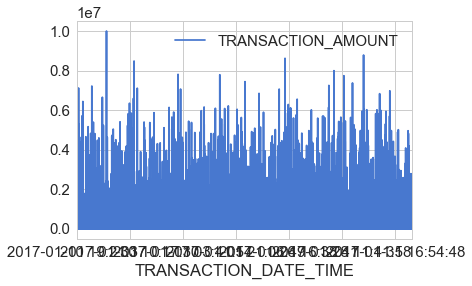

In [9]:
transactions.plot('TRANSACTION_DATE_TIME', 'TRANSACTION_AMOUNT')

In [22]:
tran_amt = transactions[['TRANSACTION_DATE_TIME', 'TRANSACTION_AMOUNT']]

In [ ]:
tran_amt['Label'] = pd.Series(labels['Class'])

In [ ]:
tran_amt.sort_values('TRANSACTION_DATE_TIME', inplace=True)

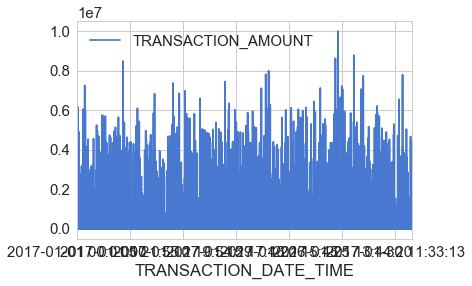

In [20]:
tran_amt.plot('TRANSACTION_DATE_TIME', 'TRANSACTION_AMOUNT', figsize=(6, 4))

In [ ]:
groups = tran_amt.groupby('Label')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.TRANSACTION_DATE_TIME, group.TRANSACTION_AMOUNT, marker='o', ms=3.5, linestyle='',
            label= "Minor" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Time series for different classes")
plt.ylabel("Transaction amount")
plt.xlabel("Time index")
plt.show();